# Homework 1  
**name:** Mina Stojanovic  
**github id:** minastoj  
**USC student id:** 4968308304  

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
import numpy as np
from numpy.linalg import inv

### Question 1
#### (b) Pre-Processing and Exploratory data analysis:  
i. Make scatterplots of the independent variables in the dataset. Use color to show Classes 0 and 1.  

In [1]:
# create columns names for each variable/feature
columns = ['pelvic_incidence', 'pelvic_tilt', 'lumbar_lordosis_angle', 'sacral_slope', 'pelvic_radius', 'degree_spondylolisthesis', 'class']

# REFERENCE: Site #2
# load data from .dat file located in ../../data/vertebral_column_data 
data = pd.read_csv('../data/vertebral_column_data/column_2C.dat', sep=' ', header=None, names=columns)

# convert NO and AB to 0 and 1
data['class'] = data['class'].map({'NO': 0, 'AB': 1})

# create a new list for independent variables
independent_vars = data.drop('class', axis=1)

# REFERENCE: Site #3
# actually plot each pair of independent variables
plt.figure(figsize=(15, 12))
sns.pairplot(data, hue='class', palette='bwr') # bwr = blue, white, red
plt.suptitle('Pairplot of Independent Variables by Class', y=1.01)
plt.show()

NameError: name 'pd' is not defined

ii. Make boxplots for each of the independent variables. Use color to show Classes 0 and 1.  

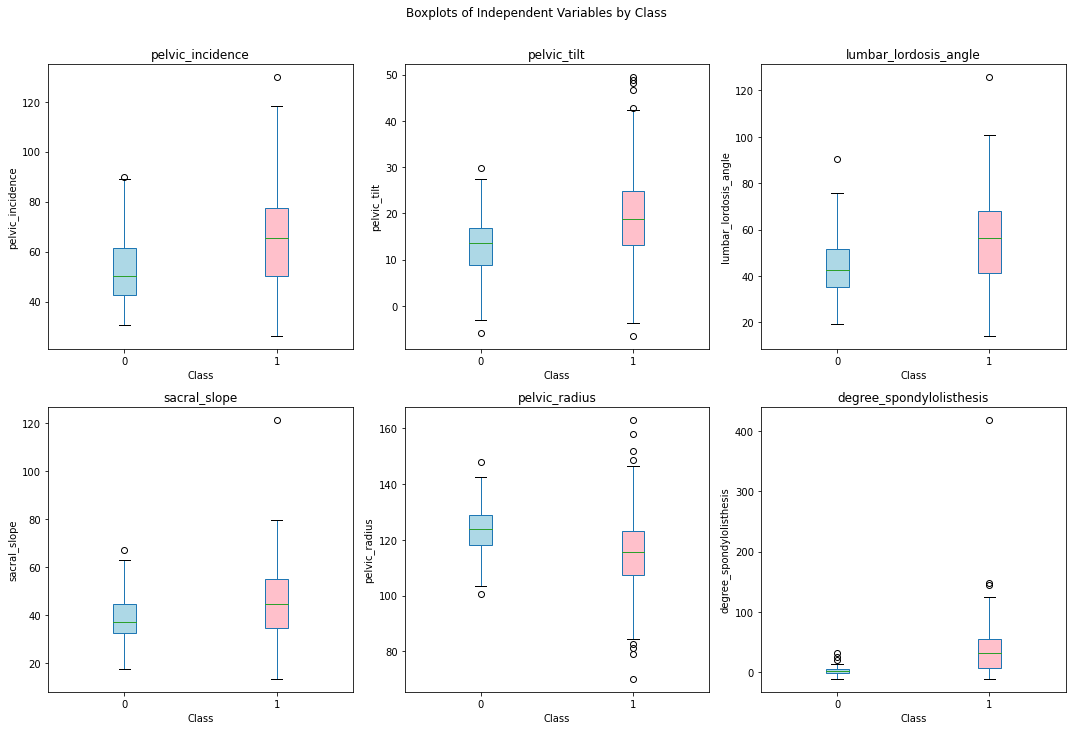

In [6]:
# create subplots for each independent variable
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
axes = axes.flatten()

# REFERENCE: Site #4, #5
# plot each boxplot
for i, var in enumerate(independent_vars):
    data.boxplot(column=var, by='class', ax=axes[i], grid=False, patch_artist=True)
    axes[i].set_title(var)
    axes[i].set_xlabel('Class')
    axes[i].set_ylabel(var)
    
    # REFERENCE: Site #6
    # color boxplots based on class
    for patch, color in zip(axes[i].artists, ['lightblue', 'pink']):
        patch.set_facecolor(color)

# show plot
plt.suptitle('Boxplots of Independent Variables by Class', y=1.01)
plt.tight_layout()
plt.show()

iii. Select the first 70 rows of Class 0 and the first 140 rows of Class 1 as the training set and the rest of the data as the test set.  

In [7]:
# split data into classes 0 and 1
class_0_data = data[data['class'] == 0] # NO
class_1_data = data[data['class'] == 1] # AB

class_0_training = class_0_data[:70] # first 70 rows of class 0
class_1_training = class_1_data[:140] # first 140 rows of class 1
training_set = pd.concat([class_0_training, class_1_training])

class_0_testing = class_0_data[70:] # remaining rows of class 0
class_1_testing = class_1_data[140:] # remaining rows of class 1
testing_set = pd.concat([class_0_testing, class_1_testing])

#### (c) Classification using KNN on Vertebral Column Data Set:    
i. Write code for k-nearest neighbors with Euclidean metric (or use a software package).

(This following code is a test that the package is working properly:)

In [8]:
training_input = training_set.drop(columns=['class']) # get all columns except 'class' as input
training_output = training_set['class'] # get 'class' column as expected output

testing_input = testing_set.drop(columns=['class']) # same as above but for testing
testing_output = testing_set['class'] # same as above but for testing

k = 5; # number of neighbors to consider

# REFERENCE: Site #7, #8
# knn using euclidean metric
knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean')

# train model
knn.fit(training_input, training_output)

# predict on test set
predictions = knn.predict(testing_input)

# get accuracy
accuracy = accuracy_score(testing_output, predictions)


ii. Test all the data in the test database with k nearest neighbors. Take decisions by majority polling. Plot train and test errors in terms of k for k ∈ {208, 205, . . . , 7, 4, 1} (in reverse order). You are welcome to use smaller increments of k. Which k∗ is the most suitable k among those values? Calculate the confusion matrix, true positive rate, true negative rate, precision, and F1-score when k = k∗.

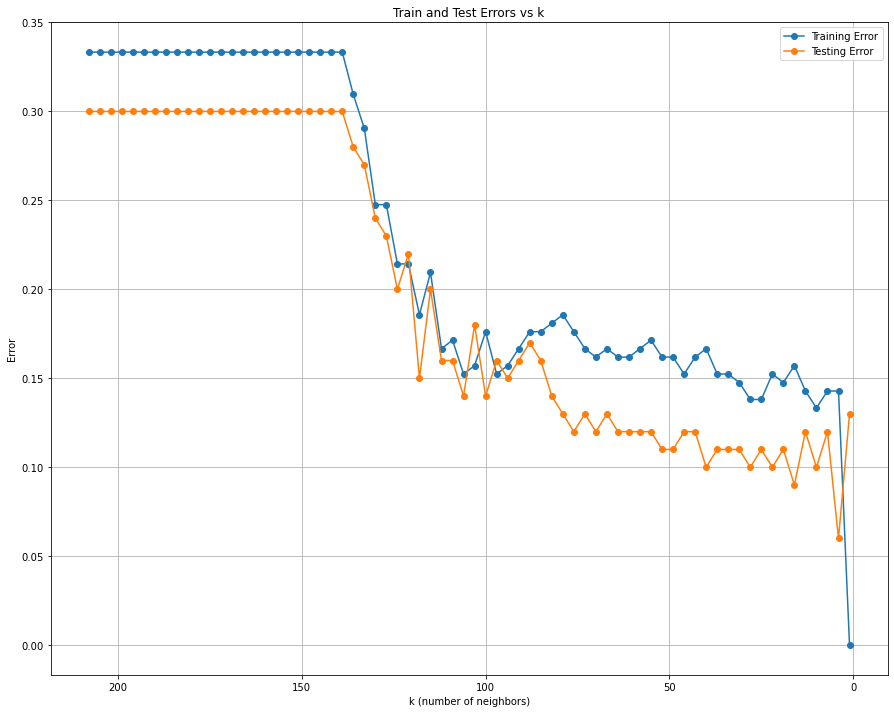

The best k* is: 4
The minimum testing error is: 0.06
Confusion Matrix:
[[25  5]
 [ 1 69]]
True Positive Rate: 0.99
True Negative Rate: 0.83
Precision: 0.93
F1-score: 0.96


In [9]:
# REFERENCE: Site #9, #10
# calculates confusion matrix, true positive rate, true negative rate, precision, and F1-score
def calculate_metrics(actual, predictions):
    cm = confusion_matrix(actual, predictions)
    tn, fp, fn, tp = cm.ravel()
    tpr = tp / (tp + fn)
    tnr = tn / (tn + fp)
    precision = tp / (tp + fp)
    f1 = 2 * (precision * tpr) / (precision + tpr)
    return cm, tpr, tnr, precision, f1

train_errors = []
test_errors = []

best_k = None
min_test_error = float('inf')
k_values = list(range(208, 0, -3))  # k from 208 down to 1 with step of 3

for k in k_values:
    # REFERENCE: Site #7, #8, #11
    knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
    knn.fit(training_input, training_output)
    
    training_predictions = knn.predict(training_input)
    testing_predictions = knn.predict(testing_input)
    
    # errors  = 1 - accuracy
    train_error = 1 - accuracy_score(training_output, training_predictions)
    test_error = 1 - accuracy_score(testing_output, testing_predictions)
    
    if(test_error < min_test_error):
        min_test_error = test_error
        best_k = k

    # store errors
    train_errors.append(train_error)
    test_errors.append(test_error)

# plot training and testing errors
plt.figure(figsize=(15, 12))
plt.plot(k_values, train_errors, label="Training Error", marker='o')
plt.plot(k_values, test_errors, label="Testing Error", marker='o')
plt.xlabel('k (number of neighbors)')
plt.ylabel('Error')
plt.title('Train and Test Errors vs k')
plt.legend()
plt.grid(True)
plt.gca().invert_xaxis()
plt.show()

# get best k and calculate its metrics
print(f"The best k* is: {best_k}")
print(f"The minimum testing error is: {min_test_error:.2f}")
best_knn = KNeighborsClassifier(n_neighbors=best_k, metric='euclidean')
best_knn.fit(training_input, training_output)
predictions = best_knn.predict(testing_input)
cm, tpr, tnr, precision, f1 = calculate_metrics(testing_output, predictions)

# metrics!!!
print(f"Confusion Matrix:\n{cm}")
print(f"True Positive Rate: {tpr:.2f}")
print(f"True Negative Rate: {tnr:.2f}")
print(f"Precision: {precision:.2f}")
print(f"F1-score: {f1:.2f}")


iii. Since the computation time depends on the size of the training set, one may only use a subset of the training set. Plot the best test error rate, which is obtained by some value of k, against the size of training set, when the size of training set is N ∈ {10,20,30,...,210}. Note: for each N, select your training set by choosing the first ⌊N/3⌋ rows of Class 0 and the first N − ⌊N/3⌋ rows of Class 1 in the training set you created in 1(b)iii. Also, for each N, select the optimal k from a set starting from k = 1, increasing by 5. For example, if N = 200, the optimal k is selected from {1,6,11,...,196}. This plot is called a Learning Curve.

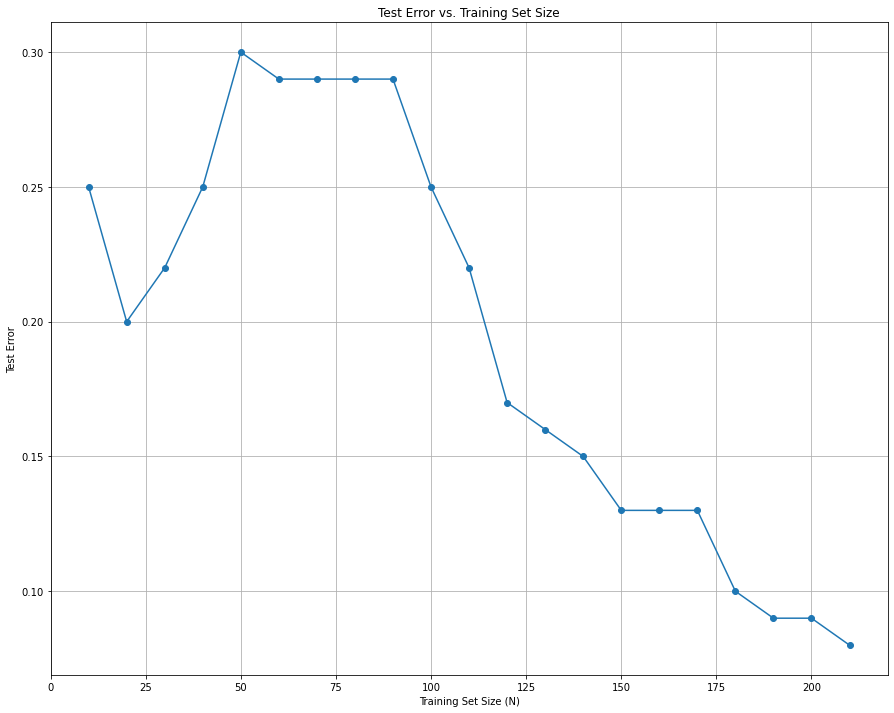

In [10]:
# for finding subset of training data based on N
def get_training_subset(training_input, training_output, N):
    # split class 0 and class 1 inputs
    class_0_input = training_input[training_output == 0]
    class_1_input = training_input[training_output == 1]

    # split class 0 and class 1 outputs
    class_0_output = training_output[training_output == 0]
    class_1_output = training_output[training_output == 1]
    
    class_0_rows = int(N / 3) # index for N/3 rows from class 0
    class_1_rows = N - class_0_rows # index for N - N/3 rows from class 1
    
    x_subset = pd.concat([class_0_input[:class_0_rows], class_1_input[:class_1_rows]])
    y_subset = pd.concat([class_0_output[:class_0_rows], class_1_output[:class_1_rows]])
    
    return x_subset, y_subset

# for finding best k and corresponding test error
def find_best_k_for_N(training_input_subset, y_train_subset, testing_input, testing_output): 
    min_test_error = float('inf')
    best_k = None
    
    for k in range(1, N - 4, 5): # k in {1, 6, 11, ..., N-4} = {1, 6, 11, ..., 196}
        # REFERENCE: Site #7, #8, #11
        knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
        knn.fit(training_input_subset, y_train_subset)
        
        predictions = knn.predict(testing_input)
        test_error = 1 - accuracy_score(testing_output, predictions)
        
        # keep best k and lowest error
        if test_error < min_test_error:
            min_test_error = test_error
            best_k = k
    
    return best_k, min_test_error

N_values = list(range(10, 211, 10)) # N from 10 to 210 with step of 10
best_errors = []

for N in N_values:
    # get subset of training data
    training_input_subset, y_train_subset = get_training_subset(training_input, training_output, N)
    
    # find best k and its test error
    best_k, test_error = find_best_k_for_N(training_input_subset, y_train_subset, testing_input, testing_output)
    
    best_errors.append(test_error)
    
# plot the test error against the training size
plt.figure(figsize=(15, 12))
plt.plot(N_values, best_errors, marker='o')
plt.xlabel('Training Set Size (N)')
plt.ylabel('Test Error')
plt.title('Test Error vs. Training Set Size')
plt.grid(True)
plt.show()

#### (d) Replace the Euclidean metric with the following metrics and test them. Summarize the test errors (i.e., when k = k∗) in a table. Use all of your training data and select the best k when {1,6,11,...,196}.  
i. Minkowski Distance:  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;A. which becomes Manhattan Distance with p = 1.  

In [11]:
# make a list for tracking test errors for each kind of metric
metrics_and_errors = []

k_values = list(range(1, 197, 5))  # k in {1, 6, 11, ..., 196}
min_test_error = float('inf')
best_k = None

for k in k_values:
    # REFERENCE: Site #7, #8, #11
    knn = KNeighborsClassifier(n_neighbors=k, metric='minkowski', p=1)
    knn.fit(training_input, training_output)
    
    predictions = knn.predict(testing_input)
    test_error = 1 - accuracy_score(testing_output, predictions)
    
    # keep best k and lowest error
    if test_error < min_test_error:
        min_test_error = test_error
        best_k = k

metrics_and_errors.append(("Manhattan Distance with p = 1", min_test_error))

# metrics!!!
print(f"The best k* is: {best_k}")
print(f"The minimum test error is: {min_test_error:.2f}")

The best k* is: 6
The minimum test error is: 0.11


&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;B. with log10(p) ∈ {0.1,0.2,0.3,...,1}. In this case, use the k∗ you found for the Manhattan distance in 1(d)iA. What is the best log10(p)?  


In [12]:
log10_p_values = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
p_values = [10 ** log_p for log_p in log10_p_values]
best_p = None
best_log10_p = None
min_test_error = float('inf')

for p in p_values:
    # REFERENCE: Site #7, #8, #11
    knn = KNeighborsClassifier(n_neighbors=best_k, metric='minkowski', p=p)
    knn.fit(training_input, training_output)
    
    # predict on the test set and compute the test error
    predictions = knn.predict(testing_input)
    test_error = 1 - accuracy_score(testing_output, predictions)
    
    if(test_error < min_test_error):
        min_test_error = test_error
        best_p = p
        best_log10_p = np.log10(p)

    # store test error for this log10(p)
    test_errors.append(test_error)

metrics_and_errors.append((f"Minkowski Distance with p = {best_p:.2f}", min_test_error))

# print the best log10(p) and the corresponding test error
print(f"The best log10(p) is: {best_log10_p:.2f}")
print(f"The minimum test error is: {min_test_error:.2f}")

The best log10(p) is: 0.60
The minimum test error is: 0.06


&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;C. which becomes Chebyshev Distance with p → ∞.  

In [13]:
k_values = list(range(1, 197, 5))  # k in {1, 6, 11, ..., 196}
min_test_error = float('inf')
best_k = None

for k in k_values:
    # REFERENCE: Site #7, #8, #11
    knn = KNeighborsClassifier(n_neighbors=k, metric='chebyshev')
    knn.fit(training_input, training_output)
    
    # predict on test set and compute test error
    predictions = knn.predict(testing_input)
    test_error = 1 - accuracy_score(testing_output, predictions)
    
    # update best k and minimum test error
    if test_error < min_test_error:
        min_test_error = test_error
        best_k = k

metrics_and_errors.append(("Chebyshev Distance", min_test_error))

# metrics!!!
print(f"The best k* is: {best_k}")
print(f"The minimum test error is: {min_test_error:.2f}")

The best k* is: 16
The minimum test error is: 0.08


ii. Mahalanobis Distance:

In [14]:
# REFERENCE: Site #12
# get covariance matrix & inverse covariance matrix of training data
cov_matrix = np.cov(training_input.T)
inv_cov_matrix = inv(cov_matrix)
 
min_test_error = float('inf')
best_k = None

for k in range(1, 197, 5): # k in {1, 6, 11, ..., 196}
    # REFERENCE: Site #7, #8, #11, #12
    knn = KNeighborsClassifier(n_neighbors=k, metric='mahalanobis', metric_params={'V': cov_matrix, 'VI': inv_cov_matrix})
    knn.fit(training_input, training_output)
    
    # predict on the test set and compute the test error
    predictions = knn.predict(testing_input)
    test_error = 1 - accuracy_score(testing_output, predictions)
    
    # update the best k and minimum test error
    if test_error < min_test_error:
        min_test_error = test_error
        best_k = k

metrics_and_errors.append(("Mahalanobis Distance", min_test_error))

# metrics!!!
print(f"The best k* is: {best_k}")
print(f"The minimum test error is: {min_test_error:.2f}")
print()

# REFERENCE: Site 13
# more metrics!!!
metrics_and_errors_df = pd.DataFrame(metrics_and_errors, columns=['Distance Metric', 'Test Error'])
print("Results:")
print(metrics_and_errors_df)


The best k* is: 1
The minimum test error is: 0.17

Results:
                    Distance Metric  Test Error
0     Manhattan Distance with p = 1        0.11
1  Minkowski Distance with p = 3.98        0.06
2                Chebyshev Distance        0.08
3              Mahalanobis Distance        0.17


#### (e) The majority polling decision can be replaced by weighted decision, in which the weight of each point in voting is inversely proportional to its distance from the query/test data point. In this case, closer neighbors of a query point will have a greater influence than neighbors which are further away. Use weighted voting with Euclidean, Manhattan, and Chebyshev distances and report the best test errors when k ∈ {1,6,11,16,...,196}.


In [15]:
def find_best_k_weighted(training_input, training_output, testing_input, testing_output, metric):
    min_test_error = float('inf')
    best_k = None
    
    for k in range(1, 197, 5): # k in {1, 6, 11, ..., 196}
        # REFERENCE: Site #7, #8, #11
        knn = KNeighborsClassifier(n_neighbors=k, metric=metric, weights='distance')
        knn.fit(training_input, training_output)
        
        # predict on test set and calculate test error
        predictions = knn.predict(testing_input)
        test_error = 1 - accuracy_score(testing_output, predictions)
        
        # update best k and minimum test error
        if test_error < min_test_error:
            min_test_error = test_error
            best_k = k
    
    return best_k, min_test_error

results = []

# euclidean distance
best_k_euclidean, test_error_euclidean = find_best_k_weighted(training_input, training_output, testing_input, testing_output, 'euclidean')
results.append(('Euclidean', best_k_euclidean, test_error_euclidean))

# manhattan distance
best_k_manhattan, test_error_manhattan = find_best_k_weighted(training_input, training_output, testing_input, testing_output, 'manhattan')
results.append(('Manhattan', best_k_manhattan, test_error_manhattan))

# chebyshev distance
best_k_chebyshev, test_error_chebyshev = find_best_k_weighted(training_input, training_output, testing_input, testing_output, 'chebyshev')
results.append(('Chebyshev', best_k_chebyshev, test_error_chebyshev))

# REFERENCE: Site #13
# metrics!!!
results_df = pd.DataFrame(results, columns=['Distance Metric', 'Best k*', 'Test Error'])
print("Results:")
print(results_df)


Results:
  Distance Metric  Best k*  Test Error
0       Euclidean        6        0.10
1       Manhattan       26        0.10
2       Chebyshev       16        0.11


#### (f) What is the lowest training error rate you achieved in this homework?  

The lowest training error rate I've achieved in this homework as been: **0.06**.

## References and Citations  
[#1 Markdown Cheat Sheet](https://www.markdownguide.org/cheat-sheet/)  
[#2 Documentation for pandas.read_csv](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html)  
[#3 Tutorial for seaborn.pairplot](https://www.geeksforgeeks.org/python-seaborn-pairplot-method/)  
[#4 Tutorial on Boxplot visualization with pandas and seaborn](https://www.geeksforgeeks.org/box-plot-visualization-with-pandas-and-seaborn/)  
[#5 Another Tutorial on Boxplot visualization](https://stackabuse.com/seaborn-box-plot-tutorial-and-examples/)  
[#6 Tutorial on filling boxplots with colors](https://matplotlib.org/stable/gallery/statistics/boxplot_color.html#)  
[#7 Sklearn KNeighbors Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)  
[#8 Tutorial on how to use Sklearn KNeighborsClassifier](https://www.datacamp.com/tutorial/k-nearest-neighbor-classification-scikit-learn)  
[#9 Confusion Matrix Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html)  
[#10 Tutorial on Confusion Matrix](https://www.w3schools.com/python/python_ml_confusion_matrix.asp)  
[#11 Sklearn Documentation on Distance Metrics](https://scikit-learn.org/dev/modules/generated/sklearn.metrics.pairwise.distance_metrics.html)  
[#12 Tutorial on Mahanalobis Distance KNeighborsClassifier](https://stackoverflow.com/questions/34643548/how-to-use-mahalanobis-distance-in-sklearn-distancemetrics)  
[#13 Tutorial on Making Pandas Dataframe Table](https://www.geeksforgeeks.org/display-the-pandas-dataframe-in-table-style/)  